In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from sklearn import preprocessing

In [2]:
tourist_df = pd.read_csv('D:/Programming/2020.12.공데해커톤/5_주요관광지입장객수.csv', sep=',', encoding='CP949')
tourist_df.drop(columns=['Unnamed: 0'], inplace=True)
tourist_df = tourist_df.loc[tourist_df['내/외국인']=='내국인']
tourist_df.drop(columns=['내/외국인'], inplace=True)
tourist_df.reset_index(drop=True, inplace=True)
tourist_df

,시도,군구,관광지,총계(2018.01 ~ 2020.09),2018년 합계,2018년 01월,2018년 02월,2018년 03월,2018년 04월,2018년 05월,...,2020년 합계,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월
0,강원도,춘천시,KT&G 상상마당 춘천아트센터,577754,306793.0,19388.0,17507.0,25912.0,28111.0,33714.0,...,43300.0,18727.0,10913.0,13660.0,0.0,0.0,0.0,0.0,0.0,0.0
1,강원도,춘천시,강원도립화목원,403984,195148.0,3304.0,3313.0,4767.0,19547.0,32640.0,...,13259.0,4128.0,2298.0,6833.0,0.0,0.0,0.0,0.0,0.0,0.0
2,강원도,춘천시,강원도청소년수련관,81574,39386.0,2208.0,2159.0,2958.0,4424.0,4365.0,...,3646.0,2731.0,861.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0
3,강원도,춘천시,강원숲체험장,65008,39266.0,1484.0,924.0,783.0,4560.0,7511.0,...,3734.0,1328.0,1271.0,1135.0,0.0,0.0,0.0,0.0,0.0,0.0
4,강원도,춘천시,강촌레일파크,573754,220734.0,5782.0,7484.0,16142.0,29408.0,21340.0,...,27282.0,9362.0,6708.0,11212.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,충청북도,증평군,좌구산 숲 명상의 집,247756,0.0,0.0,0.0,0.0,0.0,0.0,...,26564.0,9678.0,6841.0,10045.0,0.0,0.0,0.0,0.0,0.0,0.0
2572,충청북도,증평군,좌구산휴양림,673541,380411.0,21583.0,20047.0,22932.0,28086.0,39327.0,...,36403.0,10169.0,9724.0,16510.0,0.0,0.0,0.0,0.0,0.0,0.0
2573,충청북도,증평군,증평 좌구산천문대,71525,24468.0,1662.0,906.0,1417.0,1534.0,2303.0,...,4869.0,1970.0,1489.0,1410.0,0.0,0.0,0.0,0.0,0.0,0.0
2574,충청북도,증평군,증평민속체험박물관,114553,51357.0,5157.0,2584.0,1786.0,1495.0,2625.0,...,3320.0,2190.0,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
tourist_df['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [4]:
sido = tourist_df['시도'].unique()

tourist_mid_result = []
tourist_result_2018 = {}
tourist_result_2019 = {}
tourist_result_2020 = {}

for i in sido:
    sido_df = tourist_df.loc[tourist_df['시도'] == i]
    gungu = sido_df['군구'].unique()
    
    for j in gungu:
        gungu_df = sido_df.loc[sido_df['군구'] == j]
        tourist_mid_result.append(gungu_df)
        tourist_result_2018[i + ' ' + j] = gungu_df[gungu_df.columns[5:17]].sum()
        tourist_result_2019[i + ' ' + j] = gungu_df[gungu_df.columns[18:30]].sum()
        tourist_result_2020[i + ' ' + j] = gungu_df[gungu_df.columns[31:]].sum()

# b = tourist_df['군구'].unique()
# loc_a = {i:j for i,j in enumerate(tourist_df['시도'].unique())}
# loc_b = {i:j for i,j in enumerate(tourist_df['군구'].unique())}
# tourist_result[i + ' ' + j] = gungu_df[gungu_df.columns[5:17]].sum() + gungu_df[gungu_df.columns[18:30]].sum()

In [5]:
tourist_result_2018 = pd.DataFrame(tourist_result_2018)
tourist_result_2019 = pd.DataFrame(tourist_result_2019)
tourist_result_2020 = pd.DataFrame(tourist_result_2020)

In [6]:
tourist_result_2018

,강원도 춘천시,강원도 원주시,강원도 강릉시,강원도 동해시,강원도 태백시,강원도 속초시,강원도 삼척시,강원도 홍천군,강원도 횡성군,강원도 영월군,...,충청북도 충주시,충청북도 제천시,충청북도 보은군,충청북도 옥천군,충청북도 영동군,충청북도 진천군,충청북도 괴산군,충청북도 음성군,충청북도 단양군,충청북도 증평군
2018년 01월,317392.0,159251.0,176824.0,50769.0,325532.0,349004.0,56457.0,2351.0,172095.0,43847.0,...,100992.0,130658.0,63759.0,10053.0,45905.0,31567.0,54323.0,5054.0,451776.0,37436.0
2018년 02월,277875.0,149545.0,155520.0,49815.0,108559.0,301265.0,58222.0,1713.0,105400.0,34997.0,...,101320.0,150220.0,60234.0,8131.0,36337.0,43082.0,61931.0,6497.0,387629.0,32139.0
2018년 03월,346863.0,126594.0,200495.0,59303.0,38396.0,273713.0,109285.0,5524.0,21480.0,49854.0,...,121177.0,220193.0,85399.0,12662.0,42788.0,82672.0,114454.0,8120.0,549725.0,34664.0
2018년 04월,559726.0,219718.0,241150.0,73912.0,46942.0,362986.0,196568.0,8879.0,34127.0,96764.0,...,142457.0,273057.0,141411.0,20959.0,56079.0,139207.0,203364.0,7950.0,859682.0,43591.0
2018년 05월,718090.0,271313.0,306586.0,104405.0,88050.0,463726.0,248635.0,12397.0,47936.0,144583.0,...,169273.0,277063.0,212244.0,24375.0,73233.0,120761.0,249066.0,13257.0,1137639.0,54289.0
2018년 06월,579436.0,252754.0,225747.0,90776.0,95186.0,379800.0,120932.0,16640.0,33387.0,116735.0,...,132818.0,232838.0,195240.0,23899.0,75095.0,226764.0,207740.0,9477.0,915762.0,60606.0
2018년 07월,469704.0,242017.0,206260.0,103265.0,120575.0,471548.0,122547.0,17952.0,45296.0,135972.0,...,122468.0,348292.0,180137.0,24505.0,107846.0,99185.0,133900.0,4762.0,762421.0,36315.0
2018년 08월,527831.0,213536.0,314697.0,145353.0,175219.0,645743.0,181483.0,20445.0,59301.0,199488.0,...,134682.0,415341.0,185107.0,21442.0,90692.0,89687.0,144643.0,4538.0,963859.0,57966.0
2018년 09월,670284.0,214542.0,215769.0,64635.0,75138.0,422301.0,99599.0,14063.0,37807.0,109657.0,...,152803.0,424886.0,172907.0,15718.0,70501.0,115272.0,137143.0,5612.0,914568.0,23168.0
2018년 10월,970097.0,289675.0,277950.0,45046.0,83001.0,667813.0,131313.0,16601.0,54027.0,193267.0,...,157802.0,972565.0,238963.0,21837.0,81246.0,160593.0,239356.0,7054.0,1390822.0,76157.0


In [7]:
tourist_result_2020

,강원도 춘천시,강원도 원주시,강원도 강릉시,강원도 동해시,강원도 태백시,강원도 속초시,강원도 삼척시,강원도 홍천군,강원도 횡성군,강원도 영월군,...,충청북도 충주시,충청북도 제천시,충청북도 보은군,충청북도 옥천군,충청북도 영동군,충청북도 진천군,충청북도 괴산군,충청북도 음성군,충청북도 단양군,충청북도 증평군
2020년 01월,345388.0,210056.0,0.0,0.0,306389.0,0.0,40166.0,0.0,0.0,0.0,...,0.0,674007.0,49902.0,26722.0,0.0,21986.0,37883.0,3952.0,0.0,39043.0
2020년 02월,196917.0,140099.0,0.0,0.0,83845.0,0.0,22604.0,0.0,0.0,0.0,...,0.0,427025.0,36413.0,17976.0,0.0,31114.0,29891.0,2319.0,0.0,32133.0
2020년 03월,223298.0,120348.0,0.0,0.0,18978.0,0.0,14526.0,0.0,0.0,0.0,...,0.0,255125.0,54110.0,26688.0,0.0,57974.0,51429.0,11.0,0.0,55928.0
2020년 04월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,133202.0,619241.0,58429.0,24522.0,0.0,0.0,0.0,0.0,0.0,0.0
2020년 05월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,202256.0,643736.0,87532.0,57338.0,0.0,0.0,0.0,0.0,0.0,0.0
2020년 06월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,172471.0,544131.0,82604.0,43929.0,0.0,0.0,0.0,0.0,0.0,0.0
2020년 07월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18773.0,0.0,0.0,0.0,0.0,0.0,0.0
2020년 08월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,28567.0,0.0,0.0,0.0,0.0,0.0,0.0
2020년 09월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12185.0,0.0,0.0,0.0,0.0,0.0,0.0


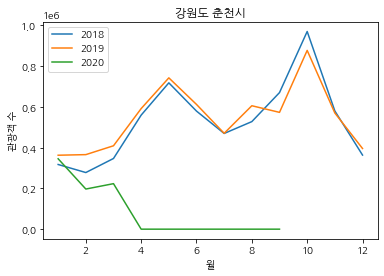

In [8]:
month = [i+1 for i in range(12)]
month2020 = [i+1 for i in range(9)]
mpl.rc('font', family='NanumGothic')

plt.plot(month, tourist_result_2018[tourist_result_2018.columns[0]], label='2018')
plt.plot(month, tourist_result_2019[tourist_result_2019.columns[0]], label='2019')
plt.plot(month2020, tourist_result_2020[tourist_result_2020.columns[0]], label='2020')
plt.title(tourist_result_2018.columns[0])
plt.xlabel('월')
plt.ylabel('관광객 수')
plt.legend()
plt.show()

No handles with labels found to put in legend.


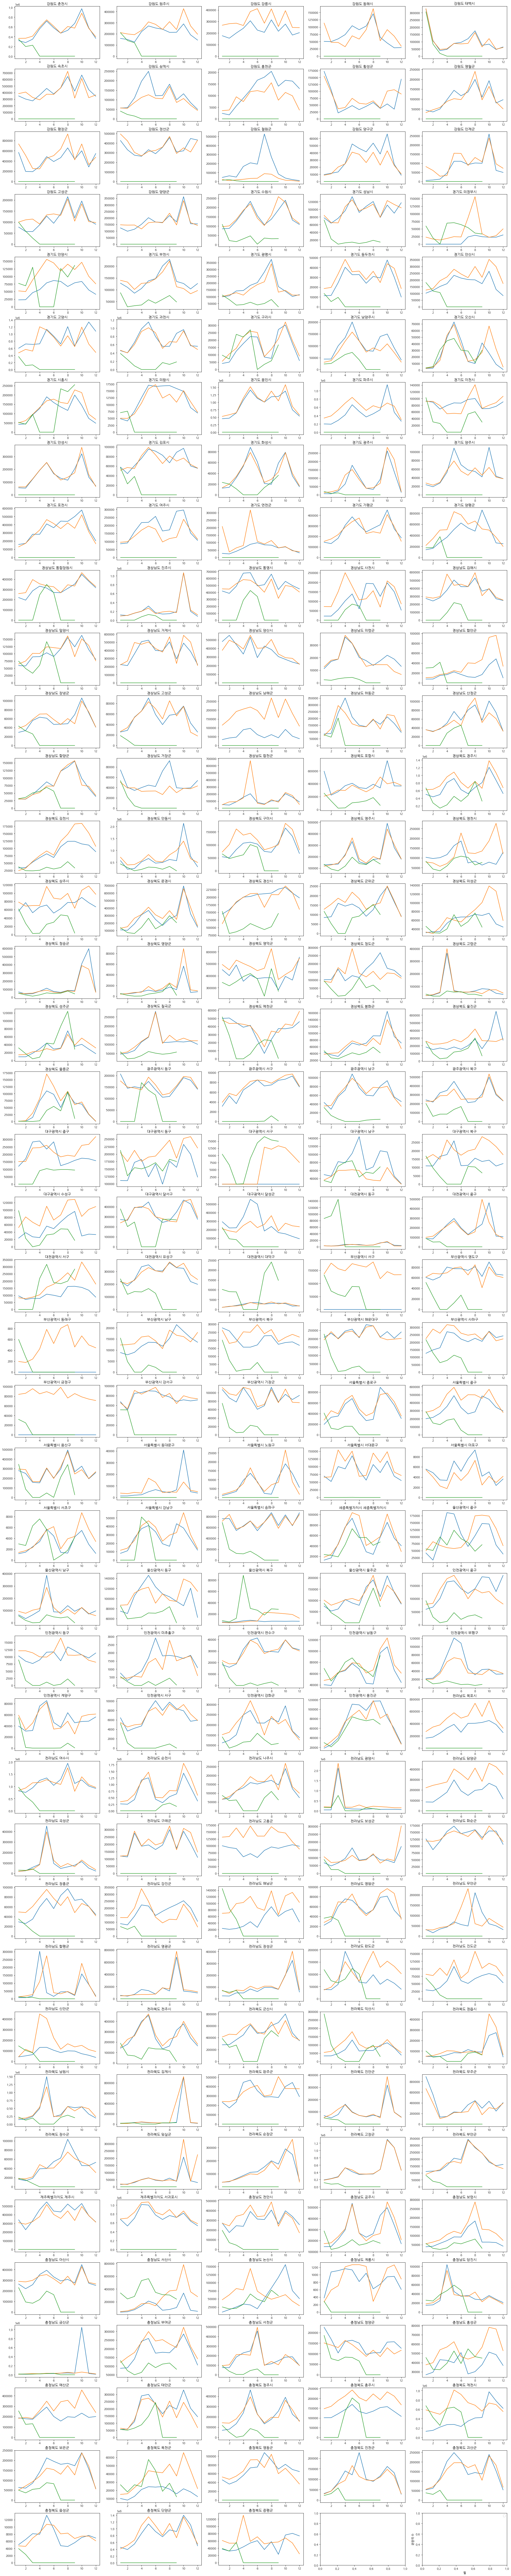

In [13]:
fig, axes = plt.subplots(nrows=41,ncols=5)
fig.set_size_inches(30, 160)
x = 0
y = 0
idx = 0

while idx < len(tourist_result_2018.columns):
    for x in range(41):
        for y in range(5):
            if idx >= len(tourist_result_2018.columns):
                    break
            axes[x][y].plot(month, tourist_result_2018[tourist_result_2018.columns[idx]], label='2018')
            axes[x][y].plot(month, tourist_result_2019[tourist_result_2019.columns[idx]], label='2019')
            axes[x][y].plot(month2020, tourist_result_2020[tourist_result_2020.columns[idx]], label='2020')
            plt.xlabel('월')
            plt.ylabel('관광객 수')
            axes[x][y].set_title(tourist_result_2018.columns[idx])
            idx += 1
            
plt.legend()
plt.show()

In [119]:
'강원도 춘천시' in tourist_result_2018.columns

True

In [115]:
tourist_result_2018.columns.map(lambda x: x[:4])

Index(['강원도 ', '강원도 ', '강원도 ', '강원도 ', '강원도 ', '강원도 ', '강원도 ', '강원도 ', '강원도 ',
       '강원도 ',
       ...
       '충청북도', '충청북도', '충청북도', '충청북도', '충청북도', '충청북도', '충청북도', '충청북도', '충청북도',
       '충청북도'],
      dtype='object', length=203)

In [11]:
tourist_result_2018.columns

Index(['강원도 춘천시', '강원도 원주시', '강원도 강릉시', '강원도 동해시', '강원도 태백시', '강원도 속초시',
       '강원도 삼척시', '강원도 홍천군', '강원도 횡성군', '강원도 영월군',
       ...
       '충청북도 충주시', '충청북도 제천시', '충청북도 보은군', '충청북도 옥천군', '충청북도 영동군', '충청북도 진천군',
       '충청북도 괴산군', '충청북도 음성군', '충청북도 단양군', '충청북도 증평군'],
      dtype='object', length=203)